In [98]:

import pandas as pd
import numpy as np
import datetime
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
rnd = random.Random( 42 )

In [99]:
base_speed = [ 60, 100, 140 ]
distances = [ 100, 60, 150, 100, 120, 250]
max_cargo = [ 100, 50, 50 ]
last_date = [ datetime.datetime(2022, 1, 1), datetime.datetime(2022, 1, 1), datetime.datetime(2022, 1, 1) ]
load_speed = 15 # seconds per unit of cargo
unload_speed = 10 # seconds per unit of cargo

In [100]:
def calculate_departure( tentative_date, train_id ):
    if tentative_date.weekday() == 6:
        tentative_date += datetime.timedelta( days = 1 )
    if tentative_date.hour > 10 and tentative_date.hour < 16 and train_id == 0:
        tentative_date = tentative_date.replace( hour = 16, minute = 0, second = 0 )
    else: 
        tentative_date = tentative_date.replace( hour = 10, minute = 0, second = 0 )
    while tentative_date in departures_used:
        tentative_date += datetime.timedelta( days = 1 )
        if tentative_date.weekday() == 6:
            tentative_date += datetime.timedelta( days = 1 )
        if tentative_date.hour == 16:
            tentative_date = tentative_date.replace( hour = 10, minute = 0, second = 0 )
    departures_used.add( tentative_date )
    return tentative_date

def generate_cargo( train_id ):
    return rnd.randint( 30, max_cargo[train_id] )

def cargo_deviation():
    return stats.rayleigh.rvs( scale = 0.5 ) / 4 + .85
def travel_deviation():
    return stats.rayleigh.rvs( scale = 0.5 ) / 4 + .85
def load_deviation(train_id, cargo):
    return (max_cargo[train_id] - cargo) / max_cargo[train_id] * 0.25 + 1
    


In [101]:
data = []
departures_used = set()
for i in range( 500 ):
    for train_id in range(3):
        trip_id = "{}_{}".format( train_id, i )
        last_date[train_id] = calculate_departure(last_date[train_id], train_id)
        if last_date[train_id].year > 2022: continue
        data.append( [ trip_id, train_id, last_date[train_id], 0, "station_A", "Comienzo de ruta"] )
        cargo = generate_cargo(train_id)
        if last_date[train_id].weekday() == 5:
            cargo = int(cargo*0.6)
        last_date[train_id] += datetime.timedelta( seconds = int(cargo * load_speed * cargo_deviation()) )
        data.append( [ trip_id, train_id, last_date[train_id], cargo, "station_A", "Final carga"] )
        data.append( [ trip_id, train_id, last_date[train_id], cargo, "station_A", "Salida de vagones"] )

        for station_indx, station_id in enumerate("BCDEFG"):
            last_date[train_id] += datetime.timedelta( seconds = int(3600*distances[station_indx] * travel_deviation() * load_deviation(train_id,cargo) / base_speed[train_id]) )
            data.append( [ trip_id, train_id, last_date[train_id], cargo, "station_{}".format(station_id), "Llegada de vagones" ] )
            unload = rnd.randint( 0, cargo )
            last_date[train_id] += datetime.timedelta( seconds = int(unload * unload_speed * cargo_deviation()) )
            cargo -= unload
            data.append( [ trip_id, train_id, last_date[train_id], cargo, "station_{}".format(station_id), "Descarga de vagones" ] )
            if station_id == "G":
                data.append( [ trip_id, train_id, last_date[train_id], cargo, "station_{}".format(station_id), "Final de ruta" ] )
                last_date[train_id] += datetime.timedelta( seconds = int(3600*sum(distances) * travel_deviation() / base_speed[train_id]) )
            else:
                data.append( [ trip_id, train_id, last_date[train_id], cargo, "station_{}".format(station_id), "Salida de vagones" ] )
df = pd.DataFrame( data, columns = [ "trip_id", "train_id", "date", "cargo", "station_id", "event" ] )

<Axes: >

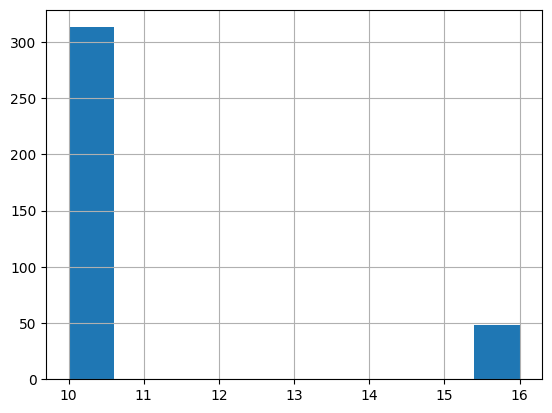

In [102]:
df[df.event== "Comienzo de ruta"].date.dt.hour.hist()

(array([119., 371., 526., 627., 668., 618., 581., 436., 372., 254., 173.,
        104.,  70.,  28.,  27.,   8.,  11.,   4.,   1.,   2.]),
 array([0.85087013, 0.87864103, 0.90641194, 0.93418285, 0.96195376,
        0.98972467, 1.01749558, 1.04526649, 1.0730374 , 1.10080831,
        1.12857922, 1.15635013, 1.18412104, 1.21189195, 1.23966286,
        1.26743377, 1.29520468, 1.32297559, 1.3507465 , 1.37851741,
        1.40628832]),
 <BarContainer object of 20 artists>)

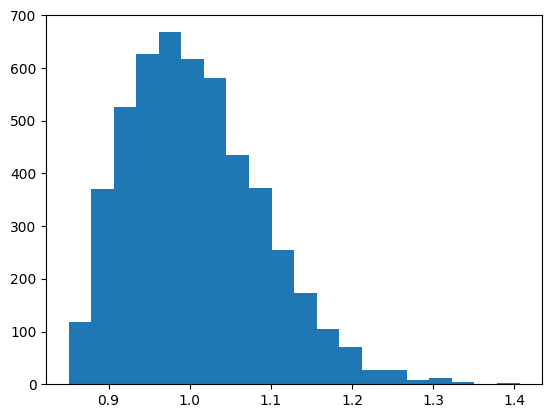

In [104]:
tst = [cargo_deviation() for i in range(5000)]
# print distribution
plt.hist( tst, bins = 20 )

# Questions

- How many records are there in the dataset?
- How many columns are there in the dataset?

---

- How many trains are there in the dataset?
- How many stations are there in the dataset?
- How many trips are there in the dataset?

---

- How long lasted the shortest trip?
- How long lasted the longest trip?
- What is the average trip duration?

---

- What is the average time to load a package in a train?
- What is the average time to unload a package in a train?

---

- How many packages were transported in total?
- How many packages were transported in average per train?
- What was the maximum number of packages transported in a train?
- What was the minimum number of packages transported in a train?
- What was the average number of packages transported in a train?

---

- How many packages were received in station X?
- What was the average number of packages received in station X?
- What was the maximum number of packages received in station X?
- What was the minimum number of packages received in station X?

---

- What was the average duration of a trip from station X to station Y?
- What was the maximum duration of a trip from station X to station Y?
- What was the minimum duration of a trip from station X to station Y?

---

- Which train transported the most packages?
- Which train transported the least packages?
- Which train made more trips?
- Which train made less trips?
- Which is the fastest train?
- Which is the slowest train?

---

- How many trips were made in January?
- How many pacakges were transported on Mondays?



